<a href="https://colab.research.google.com/github/Aniket0897/Varpas_concept/blob/main/Senior_AI_and_Data_Science_Engineer_Mock_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the MNIST Dataset select random 100 images from the dataset:

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Randomly select a subset of 100 images
num_images_to_select = 100
random_indices = np.random.choice(len(train_images), num_images_to_select, replace=False)
subset_images = train_images[random_indices]
subset_labels = train_labels[random_indices]

# Define the directory path where you want to save the images as JPG in Google Colab
save_directory = '/content/selected_images/input'

# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

# Define the ground truth folder path
ground_truth_folder = '/content/selected_images/ground_truth'

# Create the ground truth folder if it doesn't exist
os.makedirs(ground_truth_folder, exist_ok=True)

# Save each randomly selected image as JPG in the directory and collect the labels in a list
selected_labels = []
for i, (image, label) in enumerate(zip(subset_images, subset_labels)):
    filename = f'random_image_{i}.jpg'
    image_path = os.path.join(save_directory, filename)

    # Convert the image to PIL Image and save it as JPG
    pil_image = Image.fromarray(image)
    pil_image.save(image_path, 'JPEG')

    # Append the label to the selected_labels list
    selected_labels.append(label)

    # Create and save the corresponding ground truth text file
    ground_truth_filename = f'random_image_{i}.txt'
    ground_truth_path = os.path.join(ground_truth_folder, ground_truth_filename)

    with open(ground_truth_path, 'w') as file:
        file.write(str(label))

    print(f'Saved {filename} with label {label} and ground truth file {ground_truth_filename} in {ground_truth_folder}')

print(f'Saved {num_images_to_select} randomly selected images as JPG to {save_directory}')
print(f'Labels for the selected images: {selected_labels}')


11490434/11490434 [==============================] - 1s 0us/step
Saved random_image_0.jpg with label 6 and ground truth file random_image_0.txt in /content/selected_images/ground_truth
Saved random_image_1.jpg with label 3 and ground truth file random_image_1.txt in /content/selected_images/ground_truth
Saved random_image_2.jpg with label 4 and ground truth file random_image_2.txt in /content/selected_images/ground_truth
Saved random_image_3.jpg with label 2 and ground truth file random_image_3.txt in /content/selected_images/ground_truth
Saved random_image_4.jpg with label 6 and ground truth file random_image_4.txt in /content/selected_images/ground_truth
Saved random_image_5.jpg with label 3 and ground truth file random_image_5.txt in /content/selected_images/ground_truth
Saved random_image_6.jpg with label 1 and ground truth file random_image_6.txt in /content/selected_images/ground_truth
Saved random_image_7.jpg with label 4 and ground truth file random_image_7.txt in /content/sele

# Install Required Library:

In [ ]:
pip install pytesseract pillow

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr
!pip install pytesseract
!pip install pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,879 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

# Introduce noise to these images (e.g., random lines, smudges) to simulate real-world imperfections:


In [ ]:
import cv2
import os
import numpy as np

# Define the folder containing the input images
input_folder = '/content/selected_images/input'

# Define the folder where you want to save the modified images
output_folder = '/content/selected_images/output'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Function to add random noise, lines, and smudges to an image
def add_realistic_noise(image):
    noisy_image = image.copy()

    # Add random noise (e.g., Gaussian noise)
    noise = np.random.normal(0, 25, image.shape).astype(np.uint8)
    noisy_image = cv2.add(noisy_image, noise)

    # Add random lines or smudges
    for _ in range(10):  # Add 10 random imperfections
        # Randomly choose whether to add a line or smudge
        if np.random.rand() < 0.5:
            # Add a random line
            line_color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))  # Random BGR color
            line_thickness = np.random.randint(1, 4)  # Random thickness
            pt1 = (np.random.randint(0, image.shape[1]), np.random.randint(0, image.shape[0]))
            pt2 = (np.random.randint(0, image.shape[1]), np.random.randint(0, image.shape[0]))
            cv2.line(noisy_image, pt1, pt2, line_color, line_thickness)
        else:
            # Add a random smudge
            smudge_color = (np.random.randint(0, 256), np.random.randint(0, 256), np.random.randint(0, 256))  # Random BGR color
            smudge_radius = np.random.randint(5, 20)  # Random smudge radius
            smudge_center = (np.random.randint(0, image.shape[1]), np.random.randint(0, image.shape[0]))
            cv2.circle(noisy_image, smudge_center, smudge_radius, smudge_color, -1)  # Filled circle

    return noisy_image

# Process each image in the input folder and save the modified images to the output folder
for filename in os.listdir(input_folder):
    if filename.endswith(('.jpg', '.png', '.jpeg')):  # Ensure only image files are processed
        input_path = os.path.join(input_folder, filename)
        image = cv2.imread(input_path)

        if image is not None:
            noisy_image = add_realistic_noise(image)

            # Save the modified image to the output folder with the same filename
            output_path = os.path.join(output_folder, filename)
            cv2.imwrite(output_path, noisy_image)

print("Realistic noise added to all images in the folder.")

Realistic noise added to all images in the folder.


# Data Extraction using OCR & Calculate the accuracy of your OCR method:

In [ ]:
import os
import pytesseract
from PIL import Image

# Folder containing the images to be recognized
image_folder = '/content/selected_images/output'

# Folder containing ground truth data (text files)
ground_truth_folder = '/content/selected_images/ground_truth'

# Use the default Tesseract executable path in Google Colab
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Initialize variables to keep track of accuracy calculation
total_images = 0
correct_predictions = 0

# Iterate through each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):
        # Load the image using Pillow (PIL)
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path)

        # Perform OCR to extract digits
        extracted_text = pytesseract.image_to_string(img, config='--psm 6')

        # Extract digits from the extracted text
        extracted_digits = ''.join(filter(str.isdigit, extracted_text))

        # Load the corresponding ground truth data
        ground_truth_path = os.path.join(ground_truth_folder, filename.replace('.jpg', '.txt'))

        # Check if the ground truth file exists
        if os.path.exists(ground_truth_path):
            with open(ground_truth_path, 'r') as file:
                ground_truth_digits = file.read().strip()

            # Compare extracted digits with ground truth data
            if extracted_digits == ground_truth_digits:
                correct_predictions += 1

            total_images += 1

            # Print input image, extracted text, and ground truth
            print(f'Image: {filename}')
            print(f'Extracted Text: {extracted_text}')
            print(f'Ground Truth: {ground_truth_digits}')
            print()

Image: random_image_13.jpg
Extracted Text: “g

Ground Truth: 9

Image: random_image_66.jpg
Extracted Text: ae)

Ground Truth: 5

Image: random_image_51.jpg
Extracted Text: Me
lee

Ground Truth: 7

Image: random_image_77.jpg
Extracted Text: i
Se

Ground Truth: 0

Image: random_image_37.jpg
Extracted Text: pei

Ground Truth: 3

Image: random_image_99.jpg
Extracted Text: Ae

Ground Truth: 3

Image: random_image_95.jpg
Extracted Text: =:

Ground Truth: 7

Image: random_image_80.jpg
Extracted Text: ee
&

Ground Truth: 9

Image: random_image_55.jpg
Extracted Text: 5 a
‘4

Ground Truth: 5

Image: random_image_11.jpg
Extracted Text: “a
< g

Ground Truth: 9

Image: random_image_34.jpg
Extracted Text: id

Ground Truth: 5

Image: random_image_85.jpg
Extracted Text: a
4

Ground Truth: 8

Image: random_image_17.jpg
Extracted Text: oe
Ay

Ground Truth: 7

Image: random_image_98.jpg
Extracted Text: 3

Ground Truth: 5

Image: random_image_40.jpg
Extracted Text: i

Ground Truth: 8

Image

# The accuracy of your OCR method:

In [ ]:
# Calculate accuracy
accuracy = (correct_predictions / total_images) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 1.00%


# Visualize the distribution of misclassified digits:

## Confusion matrix:

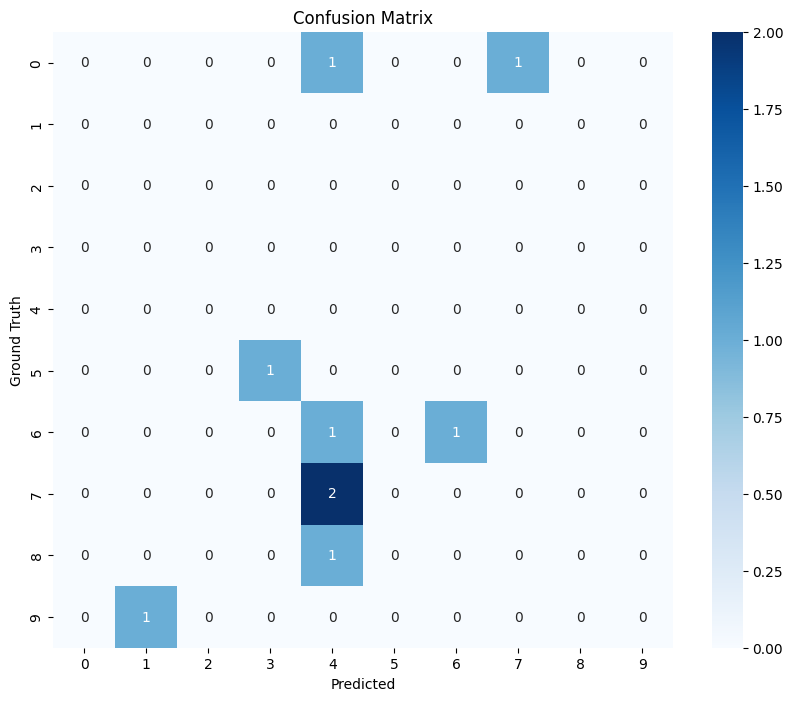

In [ ]:
import os
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Folder containing the images to be recognized
image_folder = '/content/selected_images/output'

# Folder containing ground truth data (text files)
ground_truth_folder = '/content/selected_images/ground_truth'

# Use the default Tesseract executable path in Google Colab
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Initialize variables to keep track of ground truth and predicted digits
ground_truth_digits = []
predicted_digits = []

# Iterate through each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):
        # Load the image using Pillow (PIL)
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path)

        # Perform OCR to extract digits
        extracted_text = pytesseract.image_to_string(img, config='--psm 6')

        # Extract digits from the extracted text
        extracted_digits = ''.join(filter(str.isdigit, extracted_text))

        # Load the corresponding ground truth data
        ground_truth_path = os.path.join(ground_truth_folder, filename.replace('.jpg', '.txt'))

        # Check if the ground truth file exists
        if os.path.exists(ground_truth_path):
            with open(ground_truth_path, 'r') as file:
                ground_truth_digit = file.read().strip()

            # Append ground truth and predicted digits
            ground_truth_digits.append(ground_truth_digit)
            predicted_digits.append(extracted_digits)

# Create a confusion matrix
conf_matrix = confusion_matrix(ground_truth_digits, predicted_digits, labels=[str(i) for i in range(10)])

# Plot a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.show()

##Misclassification Rates by Digit:

<ipython-input-30-29106bebad20>:55: RuntimeWarning: invalid value encountered in long_scalars
  misclassification_rate = misclassified_samples / total_samples


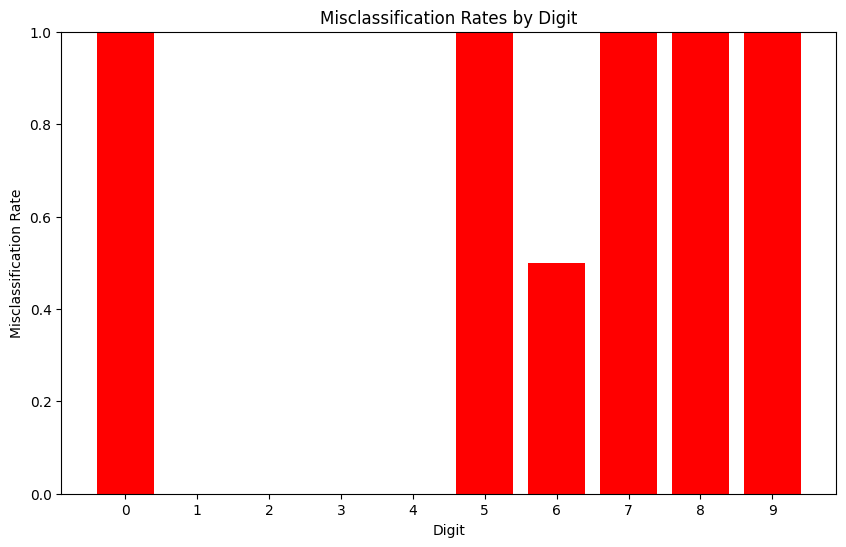

In [ ]:
import os
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Folder containing the images to be recognized
image_folder = '/content/selected_images/output'

# Folder containing ground truth data (text files)
ground_truth_folder = '/content/selected_images/ground_truth'

# Use the default Tesseract executable path in Google Colab
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Initialize variables to keep track of ground truth and predicted digits
ground_truth_digits = []
predicted_digits = []

# Iterate through each image in the folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg'):
        # Load the image using Pillow (PIL)
        img_path = os.path.join(image_folder, filename)
        img = Image.open(img_path)

        # Perform OCR to extract digits
        extracted_text = pytesseract.image_to_string(img, config='--psm 6')

        # Extract digits from the extracted text
        extracted_digits = ''.join(filter(str.isdigit, extracted_text))

        # Load the corresponding ground truth data
        ground_truth_path = os.path.join(ground_truth_folder, filename.replace('.jpg', '.txt'))

        # Check if the ground truth file exists
        if os.path.exists(ground_truth_path):
            with open(ground_truth_path, 'r') as file:
                ground_truth_digit = file.read().strip()

            # Append ground truth and predicted digits
            ground_truth_digits.append(ground_truth_digit)
            predicted_digits.append(extracted_digits)

# Create a confusion matrix
conf_matrix = confusion_matrix(ground_truth_digits, predicted_digits, labels=[str(i) for i in range(10)])

# Calculate misclassification rates for each digit
misclassification_rates = []
for i in range(10):
    total_samples = np.sum(conf_matrix[i])
    misclassified_samples = total_samples - conf_matrix[i, i]
    misclassification_rate = misclassified_samples / total_samples
    misclassification_rates.append(misclassification_rate)

# Plot a bar chart to visualize misclassification rates
plt.figure(figsize=(10, 6))
plt.bar([str(i) for i in range(10)], misclassification_rates, color='red')
plt.title('Misclassification Rates by Digit')
plt.xlabel('Digit')
plt.ylabel('Misclassification Rate')
plt.ylim(0, 1.0)
plt.show()